In [1]:
from pororo import Pororo
import json

from bbox_display import load_display

In [2]:
Pororo.available_tasks()

"Available tasks are ['mrc', 'rc', 'qa', 'question_answering', 'machine_reading_comprehension', 'reading_comprehension', 'sentiment', 'sentiment_analysis', 'nli', 'natural_language_inference', 'inference', 'fill', 'fill_in_blank', 'fib', 'para', 'pi', 'cse', 'contextual_subword_embedding', 'similarity', 'sts', 'semantic_textual_similarity', 'sentence_similarity', 'sentvec', 'sentence_embedding', 'sentence_vector', 'se', 'inflection', 'morphological_inflection', 'g2p', 'grapheme_to_phoneme', 'grapheme_to_phoneme_conversion', 'w2v', 'wordvec', 'word2vec', 'word_vector', 'word_embedding', 'tokenize', 'tokenise', 'tokenization', 'tokenisation', 'tok', 'segmentation', 'seg', 'mt', 'machine_translation', 'translation', 'pos', 'tag', 'pos_tagging', 'tagging', 'const', 'constituency', 'constituency_parsing', 'cp', 'pg', 'collocation', 'collocate', 'col', 'word_translation', 'wt', 'summarization', 'summarisation', 'text_summarization', 'text_summarisation', 'summary', 'gec', 'review', 'review_s

In [4]:
def mk_json(img):
    # ocr
    ocr = Pororo(task="ocr", lang="ko")
    img_path= "./source/"+img
    result=ocr(img_path, detail=True)

    # 원하는 정보만
    res_dic={}
    list_res=[]
    id=0    
    for idx in range(len(result["bounding_poly"])):
        #text
        text=result["bounding_poly"][idx]["description"]

        # box
        position=result["bounding_poly"][idx]["vertices"]
        all_x=[data['x'] for data in position]
        all_y=[data['y'] for data in position]
        min_x = min(all_x)
        max_x = max(all_x)
        min_y = min(all_y)
        max_y = max(all_y)

        # id
        id+=1

        # dic
        list_res.append({"text":text,"box":[min_x, min_y, max_x, max_y],"label":"","id":id})

    # json으로 저장
    name=img.split(sep='.')[0]
    with open(f'./Data/{name}.json','w',encoding='utf-8-sig') as make_file:
        json.dump(list_res, make_file, ensure_ascii=False, indent="\t")
    

mk_json("김광열.jpg")

/home/pbl/.local/lib/python3.6/site-packages/torch/nn/functional.py:3384: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


./Data/김광열.json ./source/김광열.jpg


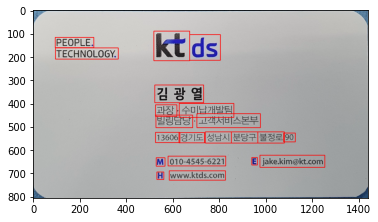

In [14]:
from bbox_display import load_display
load_display(img_filename = '김광열')

In [6]:
mk_json("테스트용_명함.jpg")
mk_json("명함1.jpg")
mk_json("명함2.jpg")
mk_json("명함3.jpg")
mk_json("명함4.jpg")
mk_json("명함5.jpg")

/home/pbl/.local/lib/python3.6/site-packages/torch/nn/functional.py:3384: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


./Data/테스트용_명함.json ./source/테스트용_명함.jpg


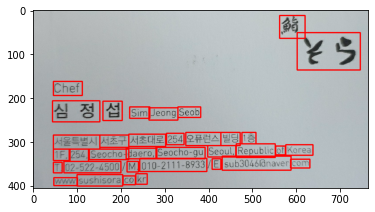

In [8]:
load_display(img_filename = '테스트용_명함')

./Data/명함1.json ./source/명함1.jpg


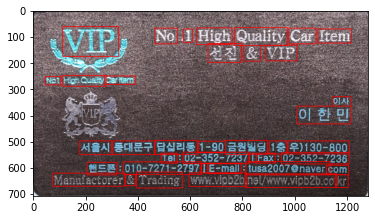

In [9]:
load_display(img_filename = '명함1')

./Data/명함2.json ./source/명함2.jpg


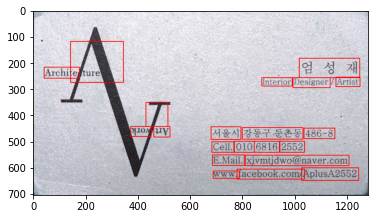

In [10]:
load_display(img_filename = '명함2')

./Data/명함3.json ./source/명함3.jpg


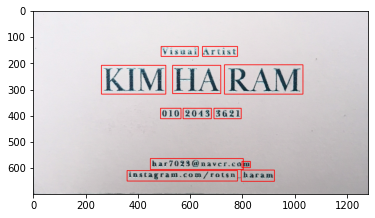

In [11]:
load_display(img_filename = '명함3')

./Data/명함4.json ./source/명함4.jpg


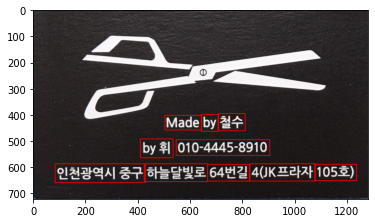

In [12]:
load_display(img_filename = '명함4')

./Data/명함5.json ./source/명함5.jpg


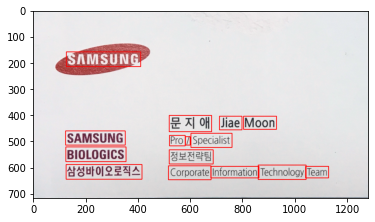

In [13]:
load_display(img_filename = '명함5')

In [5]:
# json 출력
# with open('./res.json','r',encoding='cp949') as f:
#     json_data=json.load(f)

# print(json.dumps(json_data,indent="\t"))